In [1]:
%matplotlib inline
import os
import re

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

/lfs2/home/jackyu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


<module 'climatools.scripts.g1_threshold' from '/lfs2/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [2]:
# for printing some input parameters

def innames():
    return ['vstar', 'nband', 'nv', 'dv',
            'flgh2o',
            'tsfc',
            'pressure_reference_1',
            'temperature_reference_1', 
            'pressure_reference_2', 
            'temperature_reference_2',
            'ighigh', 
            'ng', 
            'nref',
            'p_refs',
            't_refs',
            'ng_refs',
            'absth',
            'wgt',
            'option_wgt_flux',
            'option_wgt_k',
            'option_klin',
            'fac_meank',
            'klin']



def pattern_assign(name):
    return ''' 
    parameter .* :: \s* &? \s* ({} \s* = .* \n)
    '''.format(name)

def pattern_data(name):
    return '''
    (data [^/{name}]+ {name}[^,] [^/{name}]+ / [^/]+ /)
    '''.format(name=name)

def pattern_atmpro():
    return '''
    (include \s+ '.*\.pro')
    '''


def get_input_params(code, names):
    results = []
    for name in names:
        regex = re.compile(pattern_assign(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
        regex = re.compile(pattern_data(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
    regex = re.compile(pattern_atmpro(), re.VERBOSE)
    results.extend(regex.findall(code))
        
    results = [result.replace('_r8', '') for result in results]
    return results


In [3]:
analysis = scripts.Analysis()

In [4]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/lfs2/home/jackyu/radiation',
                          'crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band03b_wn_620_720',
                          'ng_6',
                          'g_ascending_k_descending',
                          'refPTs_P_600_T_250',
                          'ng_refs_6',
                          'getabsth_auto',
                          'absth_dlogN_uniform',
                          'wgt_.8_.8_.8_.6_.6_.9',
                          'wgt_flux_2',
                          'wgt_k_1',
                          'klin_1e-24',
                          'crd_a3d1611',
                          'atmpro_saw')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [5]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/lfs2/home/jackyu/radiation',
                          'crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band03b_wn_620_720',
                          'ng_6',
                          'g_ascending_k_descending',
                          'refPTs_P_600_T_250',
                          'ng_refs_6',
                          'getabsth_auto',
                          'absth_dlogN_uniform',
                          'wgt_.8_.8_.8_.6_.6_.9',
                          'wgt_flux_2',
                          'wgt_k_1',
                          'klin_1e-24',
                          'crd_a3d1611',
                          'atmpro_saw')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [6]:
fig = analysis.fig_fluxcoolr('fig1', vartypes=['cooling rate'])
fig.ggroups = list(crd.data['dgdgs'].coords['g'].values) #list(range(1, 8 + 1))
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-2, 200)

fig.set_pressure_displayrange(low=1e-2)

In [7]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [8]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [9]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [10]:
with open(os.path.join(crd.rundir, 'lblnew.f'), 
          mode='r', encoding='utf-8') as f:
    c = f.read()

print('\n\n'.join(get_input_params(c, innames())))

vstar = 620

nband = 100

nv = 200

dv = 0.005

tsfc = 257.0

ng = 6

nref = 1

p_refs = (/ 600 /)

t_refs = (/ 250 /)

ng_refs = (/ 6 /)

data wgt
     &     /.8, .8, .8, .6, .6, .9/

option_wgt_flux = 2

option_wgt_k = 1

option_klin = 1

klin = 1e-24

include 'saw75.pro'


In [11]:
fig.display_hrefanchor()

In [12]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()

table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [13]:
table_dgdgs.display_hrefanchor()

In [14]:
s_abscom = 'Overall absth'
display.HTML(climahtml.getHTML_hrefanchor(s_abscom))

In [15]:
s_ggroup_summary = 'g-group summary'
display.HTML(climahtml.getHTML_hrefanchor(s_ggroup_summary))

In [16]:
#for g in range(1, 20 + 1):
#    s = 'Table: cooling rate. g-group {}'.format(g)
#    html = climahtml.getHTML_hrefanchor(s)
#    display.display(display.HTML(html))

# Figure: cooling rate g-group 1

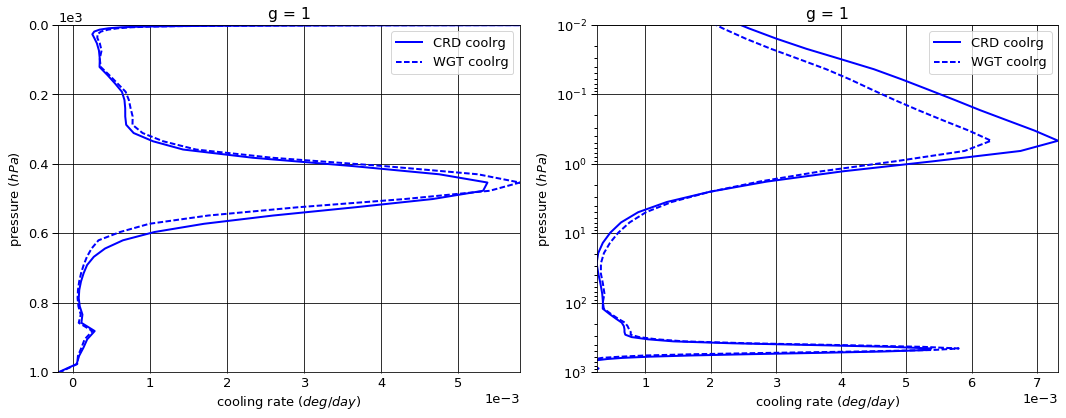

# Figure: cooling rate g-group 2

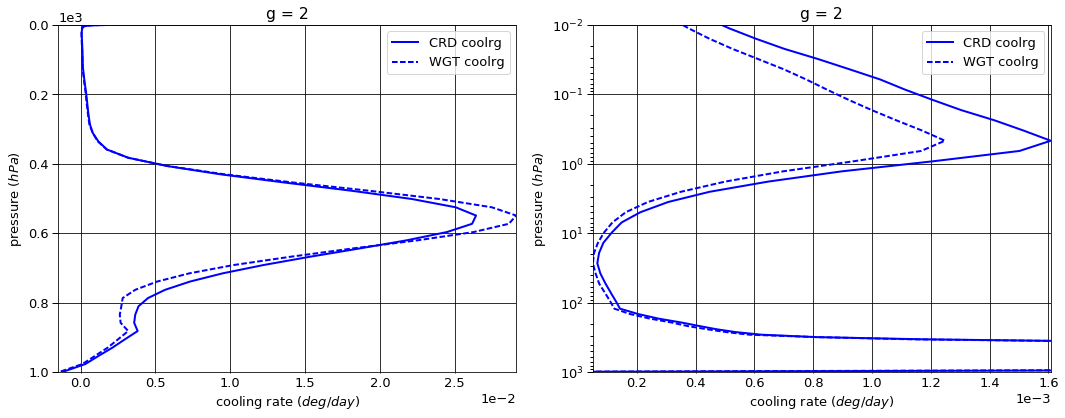

# Figure: cooling rate g-group 3

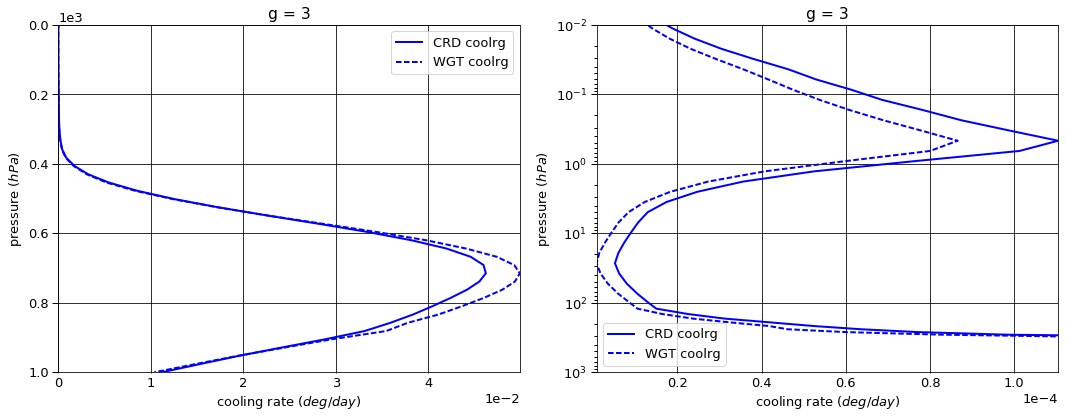

# Figure: cooling rate g-group 4

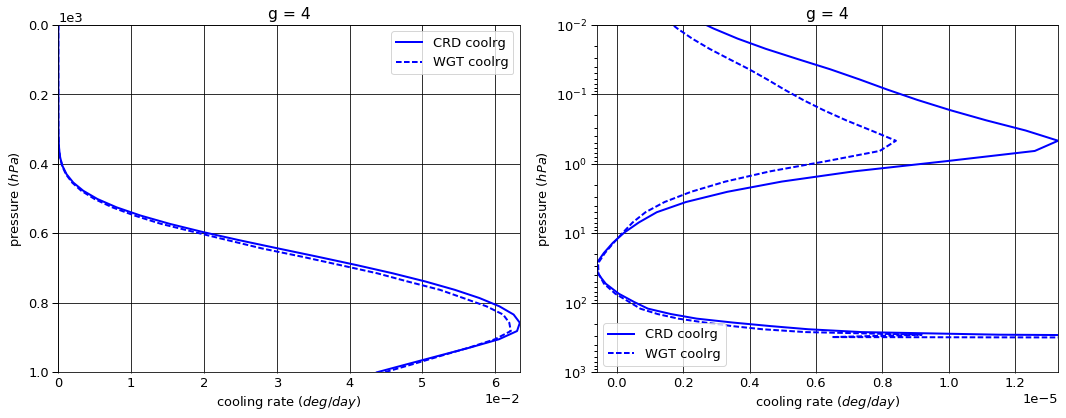

# Figure: cooling rate g-group 5

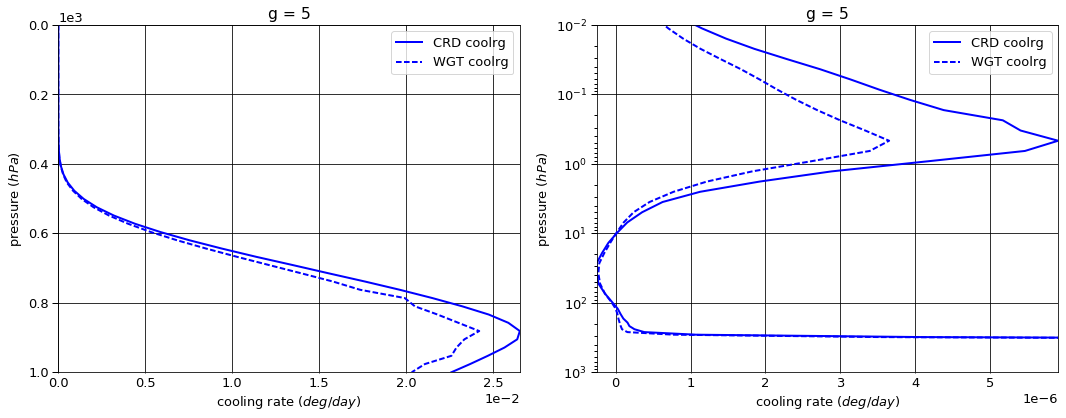

# Figure: cooling rate g-group 6

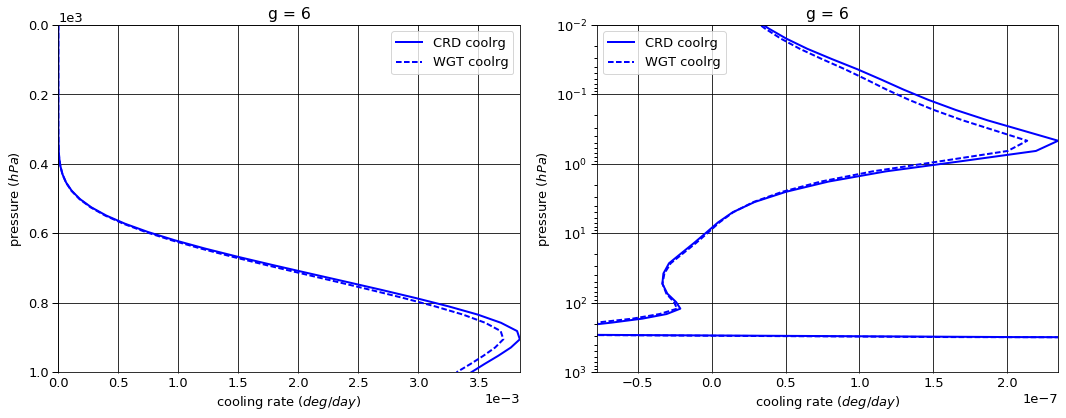

# Figure: cooling rate g-group total

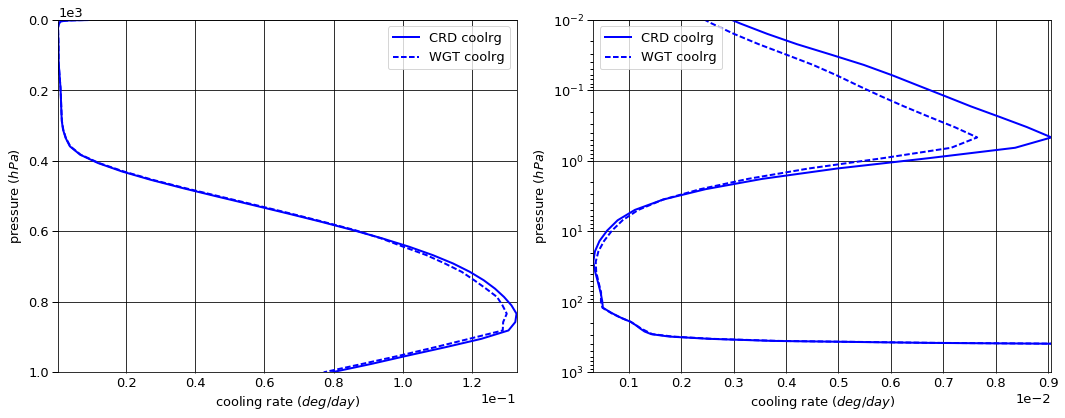

In [17]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [18]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug      fldg      fnetg
g pressure level                                
1 0.0      1      -0.134341  0.000000  -0.134341
  1013.0   76     -0.208156  0.208959   0.000803
2 0.0      1      -0.825845  0.000000  -0.825845
  1013.0   76     -1.048624  1.058713   0.010089
3 0.0      1      -2.342669  0.000000  -2.342669
  1013.0   76     -2.526732  2.242641  -0.284091
4 0.0      1      -6.649780  0.000000  -6.649780
  1013.0   76     -6.742159  2.678162  -4.063997
5 0.0      1     -10.514918  0.000000 -10.514918
  1013.0   76    -10.539213  1.034317  -9.504896
6 0.0      1      -5.969318  0.000000  -5.969318
  1013.0   76     -5.972335  0.145359  -5.826976


WGT


flug      fldg      fnetg
g pressure level                                
1 0.0      1      -0.130773  0.000000  -0.130773
  1013.0   76     -0.208156  0.208812   0.000655
2 0.0      1      -0.815937  0.000000  -0.815937
  1013.0   76     -1.048624  1.058898   0.010274
3 0.0      1      -2.338335  0.000000  -2.338335
  1013.0   76     -2.526732  2.344842  -0.181890
4 0.0      1      -6.656784  0.000000  -6.656784
  1013.0   76     -6.742159  2.598373  -4.143786
5 0.0      1     -10.516823  0.000000 -10.516823
  1013.0   76    -10.539213  0.929066  -9.610147
6 0.0      1      -5.969361  0.000000  -5.969361
  1013.0   76     -5.972335  0.140557  -5.831778


WGT - CRD


flug      fldg     fnetg
g pressure level                              
1 0.0      1      0.003568  0.000000  0.003568
  1013.0   76     0.000000 -0.000148 -0.000148
2 0.0      1      0.009907  0.000000  0.009907
  1013.0   76     0.000000  0.000185  0.000185
3 0.0      1      0.004335  0.000000  0.004335
  1013.0   76     0.000000  0.102201  0.102201
4 0.0      1     -0.007004  0.000000 -0.007004
  1013.0   76     0.000000 -0.079789 -0.079789
5 0.0      1     -0.001905  0.000000 -0.001905
  1013.0   76     0.000000 -0.105250 -0.105250
6 0.0      1     -0.000042  0.000000 -0.000042
  1013.0   76     0.000000 -0.004802 -0.004802

# Table: cooling rate. g-groups 


CRD


coolrg
g pressure    layer              
1 0.000312    1      5.105533e-04
  1001.112500 75    -1.870030e-04
2 0.000312    1      8.748037e-05
  1001.112500 75    -1.278497e-03
3 0.000312    1      6.427063e-07
  1001.112500 75     1.117102e-02
4 0.000312    1     -4.857538e-07
  1001.112500 75     4.374318e-02
5 0.000312    1     -1.614856e-07
  1001.112500 75     2.259432e-02
6 0.000312    1     -8.982098e-09
  1001.112500 75     3.440468e-03


WGT


coolrg
g pressure    layer              
1 0.000312    1      4.728005e-04
  1001.112500 75    -1.714307e-04
2 0.000312    1      4.904462e-05
  1001.112500 75    -1.497207e-03
3 0.000312    1     -7.207293e-08
  1001.112500 75     1.037741e-02
4 0.000312    1     -2.556536e-07
  1001.112500 75     4.478305e-02
5 0.000312    1     -1.108833e-07
  1001.112500 75     2.031562e-02
6 0.000312    1     -6.988744e-09
  1001.112500 75     3.317892e-03


WGT - CRD


coolrg
g pressure    layer              
1 0.000312    1     -3.775288e-05
  1001.112500 75     1.557232e-05
2 0.000312    1     -3.843575e-05
  1001.112500 75    -2.187098e-04
3 0.000312    1     -7.147792e-07
  1001.112500 75    -7.936150e-04
4 0.000312    1      2.301002e-07
  1001.112500 75     1.039860e-03
5 0.000312    1      5.060235e-08
  1001.112500 75    -2.278706e-03
6 0.000312    1      1.993353e-09
  1001.112500 75    -1.225766e-04

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-26.436871,0.000000,-26.436871
1013.0,76,-27.037219,7.368151,-19.669069



WGT


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-26.428013,0.000000,-26.428013
1013.0,76,-27.037219,7.280547,-19.756672



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,0.008859,0.000000,0.008859
1013.0,76,0.000000,-0.087603,-0.087603


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,0.000598
1001.112500,75,0.079483



WGT


,,coolrg
pressure,layer,
0.000312,1,0.000521
1001.112500,75,0.077125



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,-0.000077
1001.112500,75,-0.002358


In [19]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.00750,0.007722
2,0.03850,0.038815
3,0.09275,0.093538
4,0.24780,0.249559
5,0.38800,0.390004
6,0.22545,0.220362


In [20]:
# read and display overall absth
display.display(
    display.HTML(climahtml.getHTML_idanchor(s_abscom)))
display.display(
    display.Markdown(climahtml.getMarkdown_sectitle(s_abscom)))

display.display(pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'),
                sep=r'\s+',
                index_col=[0]))

# Overall absth

,abscom
g,
1,1.620340e-21
2,2.553906e-22
3,4.025348e-23
4,6.344568e-24
5,1.000002e-24
6,1.307067e-25


In [21]:
def spreadsheet():
    ng = crd.data['dgdgs'].dims['g']
    ng_refs = [6]
    p_refs = [600]
    
    df_abscom = pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'), 
                            sep=r'\s+', index_col=[0])
    
    # absth(g + 1) / absth(g)
    df_abscom_copy = df_abscom.copy()
    df_abscom_copy.index = df_abscom.index + 1
    df_absratio = df_abscom / df_abscom_copy
    df_absratio.columns = ['k(ig) / k(ig - 1)']
    df_absratio = df_absratio.loc[: ng]
    df_dgdgs = crd.data['dgdgs'].to_dataframe()
    
    
    df_dgdgs_cumsum = df_dgdgs.cumsum(axis=0)
    df_dgdgs_cumsum.columns = ['dg cumsum', 'dgs cumsum']
    
    data_pref = np.concatenate([p_ref * np.ones((ng_ref,)) 
                                for ng_ref, p_ref 
                                in zip(ng_refs, p_refs)], axis=0)
    df_pref = pd.DataFrame(data_pref, 
                           index=df_dgdgs.index, columns=['pref'])
    
    df_all = pd.concat([df_abscom, df_absratio,
                        df_dgdgs, df_dgdgs_cumsum,
                        df_pref], axis=1) 
    return df_all
    

In [22]:
display.display(display.HTML(climahtml.getHTML_idanchor(s_ggroup_summary)))
display.display(display.Markdown(climahtml.getMarkdown_sectitle(s_ggroup_summary)))
display.display(spreadsheet())

# g-group summary

,abscom,k(ig) / k(ig - 1),dg,dgs,dg cumsum,dgs cumsum,pref
g,,,,,,,
1,1.620340e-21,NaN,0.00750,0.007722,0.00750,0.007722,600.0
2,2.553906e-22,0.157615,0.03850,0.038815,0.04600,0.046537,600.0
3,4.025348e-23,0.157615,0.09275,0.093538,0.13875,0.140075,600.0
4,6.344568e-24,0.157615,0.24780,0.249559,0.38655,0.389634,600.0
5,1.000002e-24,0.157615,0.38800,0.390004,0.77455,0.779638,600.0
6,1.307067e-25,0.130706,0.22545,0.220362,1.00000,1.000000,600.0


In [23]:
def load_d_bigsum():
    
    ng = 10
    
    fpath = os.path.join(crd.rundir, 'd_bigsum.dat')
    df = pd.read_csv(fpath, sep=r'\s+', index_col = [0, 1])

    g_layers = [(1, 62), (2, 58)]
    
    writer = pd.ExcelWriter('_'.join(['d_bigsum_absgas',
                                      'ng_{}'.format(ng)])
                            + '.xlsx')
    for g, layer in g_layers:
        df.loc[(g, layer), :].to_excel(writer, 
                                       '({}, {})'.format(g, layer))
        

#load_d_bigsum()

# `absmean`-to-`absmeanlog` Ratio

In [24]:
pd.set_option('display.max_rows', None)
display.display(
    pd.read_csv(os.path.join(crd.rundir, 'absmean.dat'), 
                index_col=[0, 1],
                sep=r'\s+')
    )
pd.reset_option('display.max_rows')

pressure       absmean    absmeanlog      ratio
layer g                                                    
1     1     0.000312  4.136226e-21  1.005154e-22  41.150151
      2     0.000312  1.767190e-22  3.603881e-24  49.035759
      3     0.000312  2.211090e-24  1.741677e-25  12.695180
      4     0.000312  2.932729e-25  2.377013e-26  12.337876
      5     0.000312  6.418275e-26  4.507425e-27  14.239339
      6     0.000312  4.032541e-27  4.223220e-28   9.548497
2     1     0.000750  4.276616e-21  1.011836e-22  42.265927
      2     0.000750  1.823742e-22  3.633224e-24  50.196250
      3     0.000750  2.341239e-24  1.766536e-25  13.253275
      4     0.000750  2.998684e-25  2.418287e-26  12.400035
      5     0.000750  6.652756e-26  4.589373e-27  14.496001
      6     0.000750  4.189750e-27  4.368812e-28   9.590135
3     1     0.001052  4.572858e-21  1.025207e-22  44.604258
      2     0.001052  1.943472e-22  3.693571e-24  52.617705
      3     0.001052  2.629484e-24  1.816513e-25  14.475447
      4     0.001052  3.140035e-25  2.502695e-26  12.546612
      5     0.001052  7.155334e-26  4.752369e-27  15.056352
      6     0.001052  4.525861e-27  4.672511e-28   9.686145
4     1     0.001476  4.890648e-21  1.039183e-22  47.062437
      2     0.001476  2.072570e-22  3.760264e-24  55.117674
      3     0.001476  2.960543e-24  1.869837e-25  15.833159
      4     0.001476  3.295473e-25  2.591641e-26  12.715780
      5     0.001476  7.707033e-26  4.918221e-27  15.670366
      6     0.001476  4.894192e-27  4.998698e-28   9.790934
5     1     0.002070  5.227135e-21  1.053642e-22  49.610148
      2     0.002070  2.210090e-22  3.833539e-24  57.651433
      3     0.002070  3.336194e-24  1.926152e-25  17.320509
      4     0.002070  3.464719e-25  2.684293e-26  12.907381
      5     0.002070  8.305949e-26  5.086713e-27  16.328717
      6     0.002070  5.293552e-27  5.344304e-28   9.905036
6     1     0.002904  5.583098e-21  1.068653e-22  52.244251
      2     0.002904  2.356581e-22  3.914423e-24  60.202516
      3     0.002904  3.762221e-24  1.985806e-25  18.945564
      4     0.002904  3.649373e-25  2.780893e-26  13.123023
      5     0.002904  8.956716e-26  5.260238e-27  17.027207
      6     0.002904  5.727255e-27  5.710584e-28  10.029193
7     1     0.004074  5.959331e-21  1.084326e-22  54.958853
      2     0.004074  2.512627e-22  4.004061e-24  62.751969
      3     0.004074  4.245085e-24  2.049387e-25  20.713928
      4     0.004074  3.851237e-25  2.881778e-26  13.364099
      5     0.004074  9.664494e-26  5.441458e-27  17.760854
      6     0.004074  6.199142e-27  6.099352e-28  10.163608
8     1     0.005714  6.356696e-21  1.100834e-22  57.744360
      2     0.005714  2.678872e-22  4.103814e-24  65.277616
      3     0.005714  4.792077e-24  2.117842e-25  22.627166
      4     0.005714  4.072373e-25  2.987468e-26  13.631522
      5     0.005714  1.043515e-25  5.633146e-27  18.524554
      6     0.005714  6.713773e-27  6.512808e-28  10.308568
9     1     0.008015  6.775950e-21  1.118432e-22  60.584376
      2     0.008015  2.855952e-22  4.215375e-24  67.750836
      3     0.008015  5.411170e-24  2.192541e-25  24.679901
      4     0.008015  4.315045e-25  3.098727e-26  13.925219
      5     0.008015  1.127502e-25  5.838157e-27  19.312637
      6     0.008015  7.276343e-27  6.953156e-28  10.464807
10    1     0.011243  7.217948e-21  1.137496e-22  63.454690
      2     0.011243  3.044580e-22  4.341042e-24  70.134782
      3     0.011243  6.111402e-24  2.275419e-25  26.858359
      4     0.011243  4.581872e-25  3.216760e-26  14.243749
      5     0.011243  1.219140e-25  6.059791e-27  20.118510
      6     0.011243  7.893135e-27  7.422956e-28  10.633412
11    1     0.015771  7.683439e-21  1.158567e-22  66.318486
      2     0.015771  3.245468e-22  4.484019e-24  72.378565
      3     0.015771  6.902694e-24  2.369130e-25  29.135989
      4     0.015771  4.875766e-25  3.343365e-26  14.583408
      5     0.015771  1.319226e-25  6.302188e-27  20

# Histogram of wavenumbers in g-group 1

In [25]:
#pd.read_csv(os.path.join(crd.rundir, 'ig1.dat')).hist()

In [26]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')
